<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part7/P7_Ch01_CH04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST RNN Classifier

## 4. Data augmentation - Noise 추가 방법, one-hot encoding

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from IPython.display import Image

mnist = keras.datasets.mnist
(train_images, train_labels ), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.3578082482131325
0.8322710112026689
0.0845146681305673


In [5]:
print(np.random.random(size = (28,28)))

[[1.62157334e-01 8.22493534e-01 6.24777227e-01 7.11554069e-02
  7.17473702e-01 3.82882551e-01 7.03416108e-01 6.71525939e-01
  8.66289577e-01 7.96438881e-01 9.35507726e-01 9.46206456e-01
  9.65038219e-01 6.88829595e-03 5.01932978e-01 3.52612018e-01
  5.60550003e-01 1.01885664e-01 1.55724315e-01 7.90367224e-01
  4.56756792e-01 8.13954808e-02 2.57048400e-01 4.94120125e-01
  5.24322141e-01 2.48653693e-01 9.98261582e-01 4.50542179e-01]
 [8.80236915e-02 1.73047087e-01 3.81489358e-01 6.28812341e-01
  6.42002506e-01 7.26782936e-01 8.73618415e-01 4.44328127e-01
  1.35596974e-01 4.97906787e-01 1.13666508e-01 2.91946148e-01
  5.82602804e-01 6.87951241e-01 8.93844694e-01 4.00043388e-01
  3.22278671e-01 2.55891972e-02 7.87207935e-01 7.63720926e-01
  4.45065414e-01 3.30044897e-01 7.80775794e-01 6.43201883e-01
  8.43815925e-01 1.59243299e-01 1.49451163e-01 6.48080870e-01]
 [6.72300140e-02 2.52857044e-01 9.41795466e-01 9.85017036e-02
  1.97916275e-01 1.26379469e-01 9.35043576e-01 3.79668779e-01
  3.26

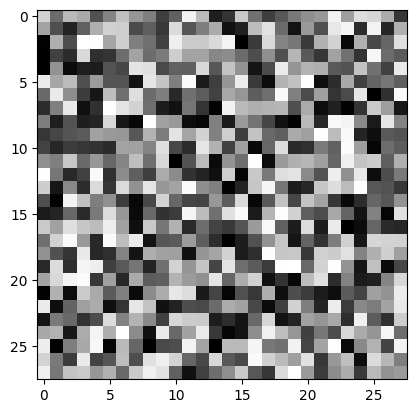

In [7]:
plt.imshow(np.random.random(size = (28,28)), cmap = 'gray')

In [11]:
print(np.random.normal(0,0.1,size =1))
print(np.random.normal(0,0.1,size =1))
print(np.random.normal(0,0.1,size =1))

[-0.05872047]
[-0.12698872]
[-0.08513749]


In [12]:
print(np.random.normal(3.0,0.01,size =1))
print(np.random.normal(3.0,0.01,size =1))
print(np.random.normal(3.0,0.01,size =1))


[3.00268058]
[2.98959473]
[2.99169164]


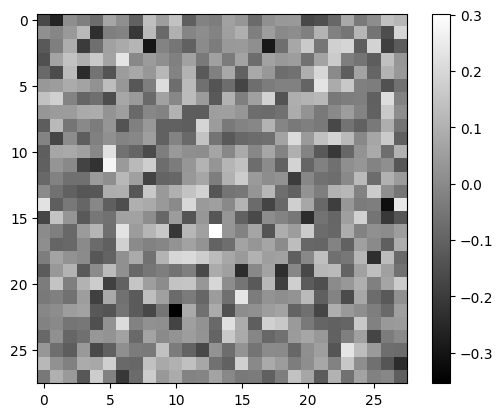

In [15]:
plt.imshow(np.random.normal(0,0.1,size =(28,28)), cmap='gray')
plt.colorbar()
plt.show()

In [22]:
noisy_image =train_images[5] + np.random.normal(0.5,0.1,size =(28,28))

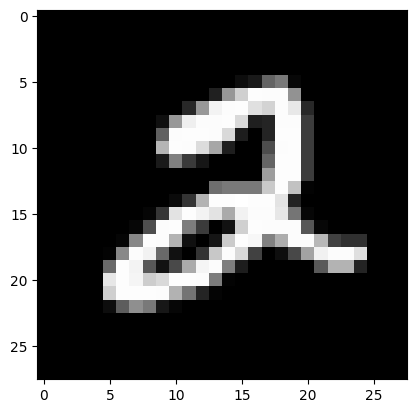

In [26]:
plt.imshow(noisy_image, cmap ='gray')
plt.show()

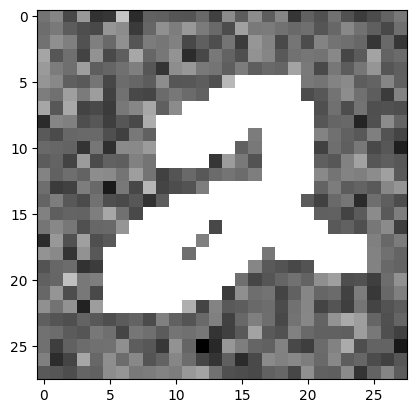

In [32]:
noisy_image[noisy_image > 1.0] =1.0
plt.imshow(noisy_image, cmap ='gray')

In [35]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images >1.0] =1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images >1.0] =1.0


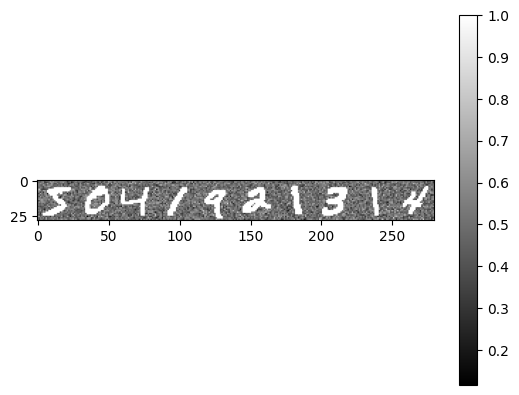

[5 0 4 1 9 2 1 3 1 4]


In [36]:
plt.imshow(train_noisy_images[:10].transpose((1,0,2)).reshape(28,-1), cmap ='gray')
plt.colorbar()
plt.show()
print(train_labels[:10])


In [38]:
# label -> one-hot encoding
from keras.utils import to_categorical
to_categorical(train_labels[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [39]:
print(train_labels.shape,test_labels.shape )
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape,test_labels.shape )


(60000,) (10000,)
(60000, 10) (10000, 10)
